In [1]:
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
#Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
x, y = oxflower17.load_data(one_hot=True)

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1088, 224, 224, 3)
(1088, 17)
(272, 224, 224, 3)
(272, 17)


In [0]:
#Build AlexNet model
def AlexNet(width, height, depth, classes):
	
	model = Sequential()
	
	#First Convolution and Pooling layer
	model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(width,height,depth),padding='valid',activation='relu'))
	model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
	
	#Second Convolution and Pooling layer
	model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
	model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
	
	#Three Convolution layer and Pooling Layer
	model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
	model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
	model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
	model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
	
	#Fully connection layer
	model.add(Flatten())
	model.add(Dense(4096,activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(4096,activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(1000,activation='relu'))
	model.add(Dropout(0.5))
	
	#Classfication layer
	model.add(Dense(classes,activation='softmax'))

	return model



In [5]:
AlexNet_model = AlexNet(224,224,3,17)
AlexNet_model.summary()
AlexNet_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 384)       1327488   
___

In [6]:
#Start training using dataaugumentation generator
History = AlexNet_model.fit(X_train ,y_train, epochs = 200,validation_split=0.2,verbose=1,batch_size=128)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 870 samples, validate on 218 samples
Epoch 1/200
870/870 [==============================] - 10s 11ms/step - loss: 2.8333 - acc: 0.0598 - val_loss: 2.8280 - val_acc: 0.0688
Epoch 2/200
870/870 [==============================] - 2s 3ms/step - loss: 2.8339 - acc: 0.0644 - val_loss: 2.8265 - val_acc: 0.1284
Epoch 3/200
870/870 [==============================] - 2s 3ms/step - loss: 2.8265 - acc: 0.0851 - val_loss: 2.8243 - val_acc: 0.1147
Epoch 4/200
870/870 [==============================] - 2s 3ms/step - loss: 2.8242 - acc: 0.0805 - val_loss: 2.8208 - val_acc: 0.1239
Epoch 5/200
870/870 [==============================] - 2s 3ms/step - loss: 2.8205 - acc: 0.0816 - val_loss: 2.8156 - val_acc: 0.1147
Epoch 6/200
870/870 [==============================] - 2s 3ms/step - loss: 2.8095 - acc: 0.1230 - val_loss: 2.8074 - val_acc: 0.1193
Epoch 7/200
870/870 [==============================] - 2s 3m

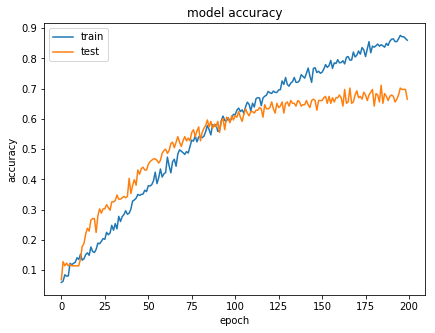

In [7]:
#Plot Loss and Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

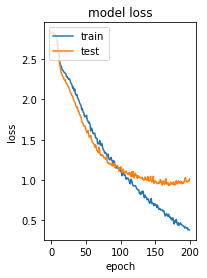

In [8]:
plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
label_dict={0:"Daffodil",1:"Snowdrop",2:"Daisy",3:"Colts' Foot",4:"Dandelion",
            5:"Cowslip",6:"Buttercup",7:"Windflower",8:"Pansy",9:"Lily valley",10:"Bluebell",
           11:"Crocus",12:"Iris",13:"Tigerlily",14:"Tulip",
           15:"Fritillary",16:"Sunflower"}

Daffodil：水仙\
Snowdrop：雪花蓮\
Daisy：菊花\
Colts' Foot：冬花\
Dandelion：蒲公英\
Cowslip：黃花九輪草\
Buttercup:毛茛\
Windflower：白頭翁\
Pansy：三色堇\
Lily valley：鈴蘭\
Bluebell：風信子\
Crocus：藏紅花\
Iris：鳶尾\
Tigerlily：卷丹\
Tulip：鬱金香\
Fritillary：莔\
Sunflower：向日葵\

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+str(np.argmax(labels[idx]))+','+label_dict[np.argmax(labels[idx])]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [0]:
prediction=AlexNet_model.predict_classes(X_test)

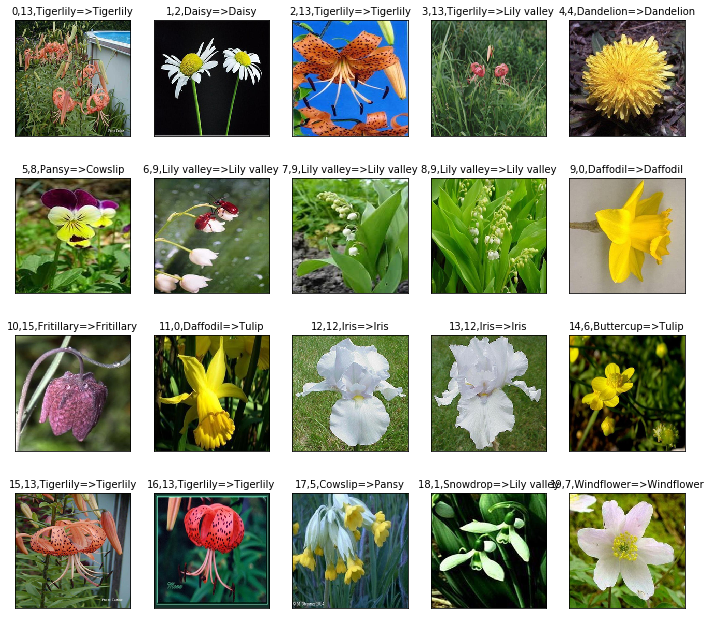

In [12]:
plot_images_labels_prediction(X_test,y_test,prediction,250,20)

In [13]:
preds=AlexNet_model.evaluate(X_test,y_test)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

272/272 [==============================] - 0s 1ms/step
Validation loss=1.086078734958873
Validation accuracy=0.6875


In [14]:
import pandas as pd
pd.crosstab(np.argmax(y_test,axis=1).reshape(-1),prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
label,,,,,,,,,,,,,,,,,
0,11,0,1,1,2,1,1,0,0,0,0,0,0,1,5,0,0
1,0,13,0,0,0,0,0,4,0,5,0,0,0,0,0,0,0
2,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,5,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,0,2,10,1,0,0,0,0,0,0,1,0,1,0,0
5,0,1,0,2,1,8,0,0,1,0,0,0,0,0,0,0,0
6,1,0,0,2,0,1,8,0,1,0,0,0,0,0,3,0,0
7,0,2,2,0,0,0,0,10,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,2,1,0,13,0,0,0,1,0,0,0,0
